<a href="https://colab.research.google.com/github/ShanyueGao/742-Group/blob/main/11_MaySIT742Task2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIT742: Modern Data Science 
**(2021 Assessment Task 02 - Data Analytics)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- It is a group assignment, and please form a group and self-enrol into the CloudDeakin groups.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension in CloudDeakin no later than *12:00pm on 21/05/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your group information in the following cell.   
</div>

**Student Information:** Please fill your group information below

- Group ID:
- Names:  
- Student IDs:  
- Emails:  
- Lab Session and Tutor (for on campus students): 

---


# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. Hence, Hotel TULIP would like you *Group-SIT742* (a hypothetical data analytics group with up to 3 data analysers) to analyse web log files and discover user accessing patterns of different web pages. 

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not restricted to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## 1.Data ETL

### 1.1 Load Data

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime
from scipy import stats
import matplotlib

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
from ipywidgets import IntProgress
import pandas as pd
from IPython.display import display
from zipfile import ZipFile

tf= ZipFile('/content/drive/MyDrive/HTWebLog_p1.zip')

namelists = tf.namelist()

ZipFile.extractall(tf)

df_ht = pd.concat (
    (pd.read_csv(
        namelist, 
        skiprows = 4, 
        delim_whitespace = True,
        error_bad_lines = False, 
        header = None, 
        parse_dates = True,
        na_values= ['-'],
        encoding = 'iso-8859-1'
    ) for namelist in namelists ),
    ignore_index = True
)



b'Skipping line 9892: expected 15 fields, saw 16\n'
b'Skipping line 79238: expected 15 fields, saw 16\n'
b'Skipping line 52695: expected 15 fields, saw 16\n'
b'Skipping line 89280: expected 15 fields, saw 16\n'
b'Skipping line 76427: expected 15 fields, saw 16\n'
b'Skipping line 41001: expected 15 fields, saw 16\nSkipping line 41238: expected 15 fields, saw 16\n'
b'Skipping line 113318: expected 15 fields, saw 16\n'
b'Skipping line 51450: expected 15 fields, saw 16\n'
b'Skipping line 45046: expected 15 fields, saw 16\n'
b'Skipping line 24408: expected 15 fields, saw 16\n'
b'Skipping line 56450: expected 15 fields, saw 16\n'


In [26]:

# Define the column names
ColumnNames = ['date', 'time', 's_sitename', 's_ip', 'cs_method', 'cs_uri_stem', 'cs_uri_query',
          's_port', 'cs_username', 'c_ip', 'cs_User_Agent', 'cs_referer', 'sc_status', 'sc_substatus', 'sc_win32_status']
df_ht.columns = ColumnNames

df_ht.head()

date      time s_sitename  ... sc_status sc_substatus sc_win32_status
0  2006-11-01  00:00:08     W3SVC1  ...     200.0          0.0             0.0
1  2006-11-01  00:00:08     W3SVC1  ...     200.0          0.0             0.0
2  2006-11-01  00:00:08     W3SVC1  ...     200.0          0.0             0.0
3  2006-11-01  00:00:09     W3SVC1  ...     200.0          0.0             0.0
4  2006-11-01  00:00:09     W3SVC1  ...     200.0          0.0             0.0

[5 rows x 15 columns]

In [27]:
df_ht.describe()

s_port  cs_username     sc_status  sc_substatus  sc_win32_status
count  8438928.0          0.0  8.438928e+06  8.438928e+06     8.438928e+06
mean        80.0          NaN  2.300596e+02  1.125143e-03     2.874621e+00
std          0.0          NaN  5.081123e+01  1.253134e-01     3.589736e+01
min         80.0          NaN  2.000000e+02  0.000000e+00     0.000000e+00
25%         80.0          NaN  2.000000e+02  0.000000e+00     0.000000e+00
50%         80.0          NaN  2.000000e+02  0.000000e+00     0.000000e+00
75%         80.0          NaN  3.040000e+02  0.000000e+00     0.000000e+00
max         80.0          NaN  5.010000e+02  1.400000e+01     1.260000e+03

In order to reduce the processing time, we will remove all missing values for data and only select 30% of total data for classification. 

**Code**: 
    1. Remove all NAs, for the columns, if the column is with 15% NAs, you need to remove that column. Then, for the rows, if there are any NAs in that row, you need to remove that row (requests)  
    2. select 30\% of the total data in to a new dataframe weblog_df.
    
    *Keep the outputs for code in your notebook.

**Report**:
    The number of requests in weblog\_df.


In [28]:
#Your code to remove missing values as required.


In [29]:
for i in ColumnNames:
  print(
      "column {}'s na value is {}".format(i,sum((df_ht[i]).isna()))
      )
  

column date's na value is 0
column time's na value is 0
column s_sitename's na value is 12
column s_ip's na value is 24
column cs_method's na value is 24
column cs_uri_stem's na value is 24
column cs_uri_query's na value is 7886568
column s_port's na value is 36
column cs_username's na value is 8438964
column c_ip's na value is 36
column cs_User_Agent's na value is 3563
column cs_referer's na value is 1309030
column sc_status's na value is 36
column sc_substatus's na value is 36
column sc_win32_status's na value is 36


In [44]:
df_ht2= df_ht.drop(['cs_uri_query','cs_username','cs_referer'],axis=1).dropna()

df_ht2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8435401 entries, 0 to 8438963
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   date             object 
 1   time             object 
 2   s_sitename       object 
 3   s_ip             object 
 4   cs_method        object 
 5   cs_uri_stem      object 
 6   s_port           float64
 7   c_ip             object 
 8   cs_User_Agent    object 
 9   sc_status        float64
 10  sc_substatus     float64
 11  sc_win32_status  float64
dtypes: float64(4), object(8)
memory usage: 836.6+ MB


In [45]:
for i in df_ht2:
  print(
      "column {}'s na value is {}".format(i,sum((df_ht2[i]).isna()))
      )

column date's na value is 0
column time's na value is 0
column s_sitename's na value is 0
column s_ip's na value is 0
column cs_method's na value is 0
column cs_uri_stem's na value is 0
column s_port's na value is 0
column c_ip's na value is 0
column cs_User_Agent's na value is 0
column sc_status's na value is 0
column sc_substatus's na value is 0
column sc_win32_status's na value is 0


In [32]:
# only 30% of total data are selected for classification
#weblog_df = df_ht.sample(frac = 0.3, random_state=1)

#Your code to show the number of requests in weblog_df


In [46]:
# only 30% of total data are selected for classification
weblog_df = df_ht2.sample(frac = 0.3, random_state=1)
weblog_df.info()
#Your code to show the number of requests in weblog_df
weblog_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530620 entries, 2485099 to 5375217
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   date             object 
 1   time             object 
 2   s_sitename       object 
 3   s_ip             object 
 4   cs_method        object 
 5   cs_uri_stem      object 
 6   s_port           float64
 7   c_ip             object 
 8   cs_User_Agent    object 
 9   sc_status        float64
 10  sc_substatus     float64
 11  sc_win32_status  float64
dtypes: float64(4), object(8)
memory usage: 251.0+ MB


date      time  ... sc_substatus sc_win32_status
2485099  2006-12-03  09:39:19  ...          0.0             0.0
2614302  2006-12-04  15:30:01  ...          0.0             0.0
8134136  2007-02-23  06:50:42  ...          0.0            64.0
1152058  2006-11-17  06:35:25  ...          0.0             0.0
8167712  2007-02-23  16:56:08  ...          0.0             0.0
...             ...       ...  ...          ...             ...
1687306  2006-11-24  02:23:21  ...          0.0            64.0
3297702  2006-12-12  03:33:42  ...          0.0             0.0
6587040  2007-01-29  23:17:59  ...          0.0             0.0
498716   2006-11-08  10:25:06  ...          0.0             0.0
5375217  2007-01-11  09:22:25  ...          0.0             0.0

[2530620 rows x 12 columns]

In [47]:
weblog_df.describe()

s_port     sc_status  sc_substatus  sc_win32_status
count  2530620.0  2.530620e+06  2.530620e+06     2.530620e+06
mean        80.0  2.300305e+02  1.036505e-03     2.896169e+00
std          0.0  5.077164e+01  1.203508e-01     3.628182e+01
min         80.0  2.000000e+02  0.000000e+00     0.000000e+00
25%         80.0  2.000000e+02  0.000000e+00     0.000000e+00
50%         80.0  2.000000e+02  0.000000e+00     0.000000e+00
75%         80.0  3.040000e+02  0.000000e+00     0.000000e+00
max         80.0  5.010000e+02  1.400000e+01     1.236000e+03

### 1.2 Feature Selection

**Code**: 
    You are required to select *'cs_method'*,*'c_ip'*,*'cs_uri_stem'*,*'cs(User_Agent)'* as input features  and 'sc_status' as class label into a new dataframe ml_df for following Machine Learning Tasks. 

*Keep the outputs for code in your notebook.

**Report**:
    1. Data Description of ml_df,  
    2. Print top 5 rows of ml_df.



In [48]:
# Your code for feature selection



#Your code to show the top 5 rows of ml_df


In [49]:
ml_df=weblog_df[['cs_method','s_ip','cs_User_Agent','cs_uri_stem','sc_status']]
ml_df.head(5)

cs_method  ... sc_status
2485099       GET  ...     200.0
2614302       GET  ...     200.0
8134136       GET  ...     304.0
1152058       GET  ...     200.0
8167712       GET  ...     200.0

[5 rows x 5 columns]

In [50]:
ml_df.describe(include='all')

cs_method       s_ip  ...                      cs_uri_stem     sc_status
count    2530620    2530620  ...                          2530620  2.530620e+06
unique         6          1  ...                             3616           NaN
top          GET  127.0.0.1  ...  /Tulip/common/common_style.aspx           NaN
freq     2525568    2530620  ...                           121304           NaN
mean         NaN        NaN  ...                              NaN  2.300305e+02
std          NaN        NaN  ...                              NaN  5.077164e+01
min          NaN        NaN  ...                              NaN  2.000000e+02
25%          NaN        NaN  ...                              NaN  2.000000e+02
50%          NaN        NaN  ...                              NaN  2.000000e+02
75%          NaN        NaN  ...                              NaN  3.040000e+02
max          NaN        NaN  ...                              NaN  5.010000e+02

[11 rows x 5 columns]

## 2.Unsupervised Learning
 You are required to complete this part only using **sklearn**.


**Code**: 
    1. Perform unsupervised learning on ml_df with K Means, with a varying K from 2 to 10;
    2. Plot in the elbow plot. 
    
    *Keep the outputs for code in your notebook.

**Report**:
    1. Figure 'KMeans' in the elbow plot, with a varying K from 2 to 10.



In [51]:
from sklearn import preprocessing
from sklearn.cluster import KMeans 

le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)

#Your code for Kmeans


#Your code for visualizing K means result as elbow plot.



In [52]:
from sklearn.cluster import KMeans
Kmean=[]
I=range(2,11)
for i in I:
  kmeanModel=KMeans(n_clusters=i)
  kmeanModel=kmeanModel.fit(le_df)
  Kmean.append(kmeanModel.inertia_)
 

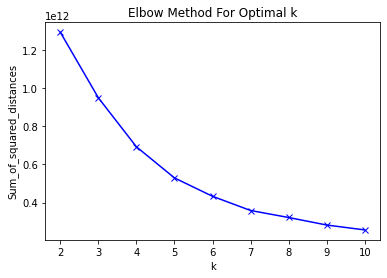

In [53]:
plt.plot(I,Kmean,"bx-")
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## 3.Supervised Learning
 You are required to complete this part only using **PySpark**.


In [54]:
!apt-get update
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.1.1
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# unzip it
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
# install findspark 
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark 
findspark.init() 

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [55]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import *

spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

### 3.1 Data Preparation 

In order to reduce the processing time, we will select 10% of le_df.

In [56]:
schema = StructType([StructField("sc_status", IntegerType(), True),
                     StructField("cs_method", IntegerType(), True),
                     StructField("c_ip", IntegerType(), True),
                     StructField("cs_uri_stem", IntegerType(), True),
                     StructField("cs(User_Agent)", IntegerType(), True)])

sl_df = spark.createDataFrame(le_df, schema)

In [57]:
#Only 10% of the data is used in this part.
sl_df = sl_df.sample(fraction=0.1, seed=1)

In [58]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# transformer
vector_assembler = VectorAssembler(inputCols=['cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)'],outputCol="features")
df_temp = vector_assembler.transform(sl_df)
df_temp.show(3)

+---------+---------+----+-----------+--------------+--------------------+
|sc_status|cs_method|c_ip|cs_uri_stem|cs(User_Agent)|            features|
+---------+---------+----+-----------+--------------+--------------------+
|        0|        0|1385|       2741|             0|[0.0,1385.0,2741....|
|        0|        0|1459|       2425|             0|[0.0,1459.0,2425....|
|        0|        0|4238|       2087|             0|[0.0,4238.0,2087....|
+---------+---------+----+-----------+--------------+--------------------+
only showing top 3 rows



In [59]:
#assign label
from pyspark.ml.feature import  StringIndexer
label_stringIdx = StringIndexer(inputCol = "sc_status", outputCol = "label")
fit=label_stringIdx.fit(df_temp)
df_temp =fit.transform(df_temp)
df_temp.show(3)

+---------+---------+----+-----------+--------------+--------------------+-----+
|sc_status|cs_method|c_ip|cs_uri_stem|cs(User_Agent)|            features|label|
+---------+---------+----+-----------+--------------+--------------------+-----+
|        0|        0|1385|       2741|             0|[0.0,1385.0,2741....|  0.0|
|        0|        0|1459|       2425|             0|[0.0,1459.0,2425....|  0.0|
|        0|        0|4238|       2087|             0|[0.0,4238.0,2087....|  0.0|
+---------+---------+----+-----------+--------------+--------------------+-----+
only showing top 3 rows



In [60]:
df_sl = df_temp.drop('cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)','sc_status')
df_sl.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.0,1385.0,2741....|  0.0|
|[0.0,1459.0,2425....|  0.0|
|[0.0,4238.0,2087....|  0.0|
+--------------------+-----+
only showing top 3 rows



###  3.2 Decision Tree or Logistic Regression

 <div class="alert alert-block alert-info">

**Code**: 
    1. Perform supervised learning on ml\_df with Decision Tree or Logistic Regression,  <br>
    2. Evaluate the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    3. Evaluate the classification result using Precision, Recall and F1 score.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1. Display the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    2. Display the classification result using Precision, Recall and F1 score.
</div>

In [61]:
#Create the data sets for training and testing
(trainingData, testData) = df_sl.randomSplit([0.7, 0.3])

In [62]:
trainingData.show(3)

+--------------+-----+
|      features|label|
+--------------+-----+
|(4,[1],[92.0])|  3.0|
|(4,[1],[96.0])|  3.0|
|(4,[1],[96.0])|  3.0|
+--------------+-----+
only showing top 3 rows



In [63]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Your code contains trainning from train data and predicting based on the test data



In [64]:
# Your code contains trainning from train data and predicting based on the test data
lr=LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
#,family="multinomial"
lrModel=lr.fit(trainingData)

In [65]:
pred=lrModel.transform(testData)

In [66]:
selectEva= pred.select('label','prediction').toPandas()
selectEva.head()

label  prediction
0    3.0         0.0
1    3.0         0.0
2    3.0         0.0
3    3.0         0.0
4    0.0         0.0

In [67]:
# Your code to display TP, TN, FP, FN

from sklearn.metrics import confusion_matrix
confusion_matrix(selectEva.label, selectEva.prediction).ravel()
#tn, fp, fn, tp = confusion_matrix(selectEva.sc_status, selectEva.prediction).ravel()


array([75822,     0,     0,     0,     0,    88,     0,     0,     0,
           0,    54,     0,     0,     0,     0,     6,     0,     0,
           0,     0,     1,     0,     0,     0,     0])

In [68]:
from sklearn.metrics import classification_report

# Your Code to display the classification results as required.



In [69]:
print(classification_report(selectEva.label, selectEva.prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     75822
         1.0       0.00      0.00      0.00        88
         2.0       0.00      0.00      0.00        54
         3.0       0.00      0.00      0.00         6
         5.0       0.00      0.00      0.00         1

    accuracy                           1.00     75971
   macro avg       0.20      0.20      0.20     75971
weighted avg       1.00      1.00      1.00     75971



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3 K-fold Cross-Validation
You are required to use K-fold cross validation to find out the best hyper-parameter set, where K = 2.
<div class="alert alert-block alert-info">

**Code**: 
Implement 2-fold cross validation for three (any three) classification models, where K = 2.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on hyper-parameters based on this cross-validation  results (Best results).
</div>

In [70]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# K = 2
# Your code for 2-fold cross validation



In [71]:
LR = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)

paramGrid = (ParamGridBuilder()\
  .addGrid(LR.regParam,[0.1,0.3,0.5])\
  .addGrid(LR.fitIntercept,[False,True])\
  .addGrid(LR.elasticNetParam,[0.0,0.5,1.0])\
  .build())

evaluator = MulticlassClassificationEvaluator(predictionCol= 'prediction')
evaluator.evaluate(pred)

crossval= CrossValidator (estimator= LR,\
                          estimatorParamMaps =paramGrid,\
                          evaluator= evaluator,\
                          numFolds=2)

In [72]:
cvModel = crossval.fit(trainingData)

In [73]:
predictions = cvModel.transform(testData)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)

0.9970590505481786

## 4.Association Rule Mining
<div class="alert alert-block alert-info">

**Code**: 
Implement association rule mining with a suitable threshold for support, and confidence 
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on on ARMing results.
</div>

In [74]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=ee6e4eb0dee6163fc7a4102bc295de03d04ef6e44cf53a2daf39cb3a4143d0b1
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [75]:
# you can also use PySpark package, if preferred
from apyori import apriori

# Your code



In [76]:
  import re

In [107]:
ARM_list=[]
for i in df_ht2['cs_uri_stem']:
  text=i.rsplit('/', 1)[-1]
  ARM_list.append(text)

df_ht2['word'] = ARM_list


In [108]:
top_url=df_ht2['cs_uri_stem'].value_counts().index[df_ht2['cs_uri_stem'].value_counts()>20000]
df_ht3=df_ht2[df_ht2['cs_uri_stem'].isin(top_url)]
df_ht3

date  ...                                 word
0        2006-11-01  ...                         Default.aspx
1        2006-11-01  ...                      home_index.aspx
2        2006-11-01  ...                        CommonUtil.js
3        2006-11-01  ...                    common_style.aspx
4        2006-11-01  ...                          top_img.jpg
...             ...  ...                                  ...
8438959  2007-02-28  ...  sectionbanner_greenpractice_off.gif
8438960  2007-02-28  ...    sectionbanner_recruitment_off.gif
8438961  2007-02-28  ...                           awards.jpg
8438962  2007-02-28  ...                           bottom.jpg
8438963  2007-03-01  ...   sectionbanner_accommodation_on.gif

[5190229 rows x 13 columns]

In [109]:
dfarm =df_ht3[['date','word','c_ip']]
dfarm.groupby(['c_ip','date'])['word'].apply(list).to_frame(name='word').to_csv('ar.csv')
df_ar2=dfarm.groupby(['c_ip','date'])['word'].apply(list).to_frame(name='word')
df_ar2

word
c_ip           date                                                         
12.0.237.66    2006-12-15  [sectionbanner_accommodation_on.gif, sectionba...
               2007-02-26  [Default.aspx, home_index.aspx, CommonUtil.js,...
12.10.160.114  2006-12-15  [Default.aspx, home_index.aspx, CommonUtil.js,...
12.10.219.36   2007-02-08  [Default.aspx, home_index.aspx, common_style.a...
12.10.219.37   2006-11-06  [CommonUtil.js, common_style.aspx, top_logo.gi...
...                                                                      ...
91.153.202.190 2007-02-26  [Default.aspx, favicon.ico, home_index.aspx, c...
91.153.59.82   2007-02-26  [favicon.ico, Default.aspx, home_index.aspx, C...
91.163.210.190 2006-12-30  [Default.aspx, favicon.ico, home_index.aspx, C...
91.64.232.158  2006-11-13  [Default.aspx, home_index.aspx, common_style.a...
91.76.107.189  2007-02-06                   [sectionbanner_whatsnew_off.gif]

[135571 rows x 1 columns]

In [111]:
transactions=[]
for i in df_ar2['word']:
  transactions.append(list(set(i)))

transactions

[['topmenu_ja.gif',
  'sectionbanner_catering_on.gif',
  'sectionbanner_greenpractice_off.gif',
  'tbl_grad_bg.jpg',
  'CommonUtil.js',
  'topmenu_zh-hk.gif',
  'bar_2.jpg',
  'bar_1.gif',
  'sectionbanner_aboutus_off.gif',
  'spacer.gif',
  'photo_overview1.jpg',
  'sectionbanner_aboutus_on.gif',
  'bullet.gif',
  'topmenu_reservations.gif',
  'sectionbanner_recruitment_off.gif',
  'sidebanner_7.jpg',
  'sectionbanner_gifts_on.gif',
  'photo_overview2.jpg',
  'top_logo.gif',
  'sectionbanner_accommodation_on.gif',
  'common_style.aspx',
  'top_bar.jpg',
  'topmenu_zh-cn.gif',
  'rightmenu_bg.gif',
  'topmenu_contactus.gif',
  'bottom.jpg',
  'sidebanner_11.jpg',
  'top_img.jpg'],
 ['topmenu_ja.gif',
  'sectionbanner_whatsnew_off.gif',
  'home.swf',
  'awards.jpg',
  'Default.aspx',
  'sectionbanner_greenpractice_off.gif',
  'CommonUtil.js',
  'topmenu_zh-hk.gif',
  'sectionbanner_gifts_off.gif',
  'sectionbanner_catering_off.gif',
  'sectionbanner_dining_off.gif',
  'sectionbanner_abo

In [112]:
new_trans=[]
for i in transactions:
   if any('reservation' in s for s in i):
     new_trans.append(i)
new_trans

[['topmenu_ja.gif',
  'sectionbanner_catering_on.gif',
  'sectionbanner_greenpractice_off.gif',
  'tbl_grad_bg.jpg',
  'CommonUtil.js',
  'topmenu_zh-hk.gif',
  'bar_2.jpg',
  'bar_1.gif',
  'sectionbanner_aboutus_off.gif',
  'spacer.gif',
  'photo_overview1.jpg',
  'sectionbanner_aboutus_on.gif',
  'bullet.gif',
  'topmenu_reservations.gif',
  'sectionbanner_recruitment_off.gif',
  'sidebanner_7.jpg',
  'sectionbanner_gifts_on.gif',
  'photo_overview2.jpg',
  'top_logo.gif',
  'sectionbanner_accommodation_on.gif',
  'common_style.aspx',
  'top_bar.jpg',
  'topmenu_zh-cn.gif',
  'rightmenu_bg.gif',
  'topmenu_contactus.gif',
  'bottom.jpg',
  'sidebanner_11.jpg',
  'top_img.jpg'],
 ['topmenu_ja.gif',
  'sectionbanner_whatsnew_off.gif',
  'home.swf',
  'awards.jpg',
  'Default.aspx',
  'sectionbanner_greenpractice_off.gif',
  'CommonUtil.js',
  'topmenu_zh-hk.gif',
  'sectionbanner_gifts_off.gif',
  'sectionbanner_catering_off.gif',
  'sectionbanner_dining_off.gif',
  'sectionbanner_abo

In [115]:
from apyori import apriori
rules = apriori(new_trans, min_support = 0.7, min_confidence = 0.3, min_lift=1, min_length = 3, max_length =3)
results = list(rules)

for i in range(len(results)):
  print("##############################################################################")
  print(i)
  print(results[i])
  print(results[i].items)

Streaming output truncated to the last 5000 lines.
787
RelationRecord(items=frozenset({'home_index.aspx', 'Default.aspx', 'sectionbanner_gifts_off.gif'}), support=0.770674172362954, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'home_index.aspx', 'Default.aspx', 'sectionbanner_gifts_off.gif'}), confidence=0.770674172362954, lift=1.0), OrderedStatistic(items_base=frozenset({'Default.aspx'}), items_add=frozenset({'home_index.aspx', 'sectionbanner_gifts_off.gif'}), confidence=0.9838403041825095, lift=1.2050177401421152), OrderedStatistic(items_base=frozenset({'home_index.aspx'}), items_add=frozenset({'Default.aspx', 'sectionbanner_gifts_off.gif'}), confidence=0.9290176647996553, lift=1.2039488019614408), OrderedStatistic(items_base=frozenset({'sectionbanner_gifts_off.gif'}), items_add=frozenset({'home_index.aspx', 'Default.aspx'}), confidence=0.7903780068728522, lift=1.011474772417243), OrderedStatistic(items_base=frozenset({'home_index.aspx', 'Default.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Part II - Web Crawling

## Overview
In 2021, 
to better introduce and understand the research works on the professors,
Deakin university wants to perform the citation prediction on individual professor level.
You are required to implement a web crawler to crawl the *citation* information 
for A/Professor Gang Li from 2003 to 2021 (start at 2003 and end at 2021),
and also conduct several prediction coding tasks. 
You will need to make sure that 
the web crawling code and prediction code meets the requirements.
You are free to use any **Python** package for Web crawling and prediction 
by finishing below tasks.  


## 5.Crawl Gang Li citation information from 2003 to 2021

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to write the code to generate the csv for Gang Li's citation from 2003 to 2021
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [83]:
# Your code to crawl and generate the csv, and save it to variable create_df
#import pandas as pd
#create_df = pd.DataFrame()





In [116]:
# Import packages
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import quote
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import warnings

In [118]:
#5 Crawl

Cited = []
Year = []
 
url = "https://scholar.google.com.au/citations?hl=en&user=dqwjm-0AAAAJ" 
 
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'html.parser')
soup1= soup.findAll("div",{"class":"gsc_md_hist_b"})
for year in soup1:
  years = year.findAll("span",{"class":"gsc_g_t"})
  for year in years:
    year=year.text
    Year.append(year)
for number in soup1:
  numbers= number.findAll("a")
  for number in numbers:
    cited = number.text
    Cited.append(cited)

dict ={"year":Year,"Citation":Cited}   

create_df = pd.DataFrame(dict)

create_df.to_csv('Citation2003-2021.csv', index = False, header = True)

print(create_df)

    year Citation
0   2003       15
1   2004       34
2   2005       17
3   2006       11
4   2007       33
5   2008       41
6   2009       57
7   2010       68
8   2011      105
9   2012      129
10  2013      172
11  2014      251
12  2015      290
13  2016      339
14  2017      386
15  2018      450
16  2019      579
17  2020      838
18  2021      315


## 6.Train Arima to predict the 2018 to 2020 citation

### 6.1 Train Arima Model
 <div class="alert alert-block alert-info">

**Code**: 
    You will need to use the create_df and then perform the
Arima training with parameter of $p=1$, $q=1$ and $d=1$ on data from 2003 to 2017 (15 years)
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [119]:
# your code to use create_df to split the data into train (year 2003 to 2017) and test



In [120]:
!pip install "statsmodels==0.11.1"
from statsmodels.tsa.arima.model import ARIMA

In [121]:
#read the data and make sure the year is in datetime formate
from pandas import datetime

create_df['year'] = pd.to_datetime(create_df['year'])
create_df=create_df.set_index('year')
create_df

Citation
year               
2003-01-01       15
2004-01-01       34
2005-01-01       17
2006-01-01       11
2007-01-01       33
2008-01-01       41
2009-01-01       57
2010-01-01       68
2011-01-01      105
2012-01-01      129
2013-01-01      172
2014-01-01      251
2015-01-01      290
2016-01-01      339
2017-01-01      386
2018-01-01      450
2019-01-01      579
2020-01-01      838
2021-01-01      315

In [122]:
#set up train and test

X=create_df.Citation.astype('float32')
train, test = X[0:15], X[15:-1]

#6.1 Train Arima Model
#build model
warnings.filterwarnings("ignore")

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Citation   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -62.283
Date:                Thu, 20 May 2021   AIC                            130.565
Time:                        12:20:23   BIC                            132.482
Sample:                    01-01-2003   HQIC                           130.388
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9486      0.240      3.950      0.000       0.478       1.419
ma.L1         -0.4599      0.652     -0.705      0.481      -1.738       0.818
sigma2       387.7366    165.805      2.339      0.0

### 6.2 Predicting the citation and Calculate the RMSE
 <div class="alert alert-block alert-info">

**Code**: 
    you will need to use the trained Arime model to predict the citation on year 2018, 2019 and 2020.
You will need to perform the evaluation by comparing the predicted citation from 2018 to 2020 with 
the true citation from 2018 to 2020 and calculate the RMSE (root mean square error).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [123]:
# your code to predict the citation and save it to variable preds. You may need to output the confidence interval(95%) here as well

In [124]:
# Print the error below by comparing the test and preds:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Your code to show the performance RMSE

In [125]:
#6.2 Predicting the citation and Calculate the RMSE
#predictions=[]

result = model_fit.get_prediction(start=15,end=17)
predictions = result.predicted_mean
ci = result.conf_int(0.05)
#predictions.append(yhat)
print('predictions:')
print(predictions)
print("*****************************")

print("true citations:")
print(test)

# RMSE
print("*****************************")
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predictions:
2018-01-01    429.164660
2019-01-01    470.109479
2020-01-01    508.948617
Freq: AS-JAN, dtype: float64
*****************************
true citations:
year
2018-01-01    450.0
2019-01-01    579.0
2020-01-01    838.0
Name: Citation, dtype: float32
*****************************
Test RMSE: 200.471


### 6.3 Draw the visualization to compare

 <div class="alert alert-block alert-info">

**Code**: 
   You will also need to use matplotlib to draw the line plot with training data from 2013 to 2017,
the testing truth, the prediction and also the confidence interval (95%). 
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [126]:
# You code: Visualize as required, the prediction with its confidence interval


In [127]:
df= pd.concat([X[10:16],test,predictions,ci], axis=1)
df.columns=['training', 'tesint','predictions','lower','upper']
df

training  tesint  predictions       lower       upper
year                                                             
2013-01-01     172.0     NaN          NaN         NaN         NaN
2014-01-01     251.0     NaN          NaN         NaN         NaN
2015-01-01     290.0     NaN          NaN         NaN         NaN
2016-01-01     339.0     NaN          NaN         NaN         NaN
2017-01-01     386.0     NaN          NaN         NaN         NaN
2018-01-01     450.0   450.0   429.164660  390.570951  467.758369
2019-01-01       NaN   579.0   470.109479  400.897737  539.321220
2020-01-01       NaN   838.0   508.948617  406.642216  611.255017

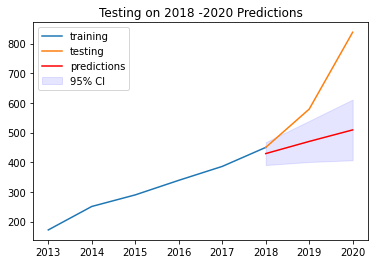

In [128]:
#plotting
pyplot.title('Testing on 2018 -2020 Predictions')
pyplot.plot(df['training'],label='training')
pyplot.plot(df['tesint'],label='testing')
pyplot.plot(df['predictions'], color='red',label='predictions')
pyplot.fill_between(df.index, df['lower'], df['upper'], alpha=0.1, color='b', label="95% CI")
pyplot.legend()
pyplot.show()

## 7.Conduct the Grid Search with paramter selection and then predict the 2021 and 2022

### 7.1 Grid Search
 <div class="alert alert-block alert-info">

**Code**: 
  You will need to run the grid search for parameter $p=[1,2]$, 
$q=[1,2]$,
$d=[1,2]$
with training data on year 2003 to 2017 and testing data on 2018 to 2020
The result of the search on each paratemer combination (eg: p=1,q=1,d=1)
will need to be stored in the "search-results.csv",
The search-results.csv will have the column of "RMSE" and column "PARAMETER".
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [129]:
# your code to run grid search
#p = list(range(1,3))
#q = list(range(1,3))
#d = list(range(1,3))
#RMSE = []
#PARAMETER = []




In [130]:
# your code to generate the seach-results.csv and print the top 6 rows
#Results = pd.DataFrame({'RMSE':RMSE,'Parameter':PARAMETER})
#Results.head(6)





In [131]:
#7.1 Grid Search
Parameter=[]
RSME = []


history = [x for x in train]
predictions = list()

p=[1,2]
q=[1,2]
d=[1,2]

warnings.filterwarnings("ignore")

for i1 in p:
  for i2 in q:
    for i3 in d:
      for t in range(len(test)):
	      model = ARIMA(history, order=(i1,i3,i2))
	      model_fit = model.fit()
	      output = model_fit.forecast()
	      yhat = output[0]
	      predictions.append(yhat)
	      obs = test[t]
	      history.append(obs)
	      print('predicted=%f, expected=%f' % (yhat, obs))  
      rmse = sqrt(mean_squared_error(test, predictions))
      parameter=[i1,i3,i2]
      history = [x for x in train]
      predictions = list()  
      RSME.append(rmse)
      Parameter.append(parameter)
      print('Test RMSE: %.3f' % rmse,i1,i3,i2)   
 
dict2= {'RSME':RSME, 'Parameter(p,d,q)':Parameter}


predicted=429.164660, expected=450.000000
predicted=502.372082, expected=579.000000
predicted=677.221026, expected=838.000000
Test RMSE: 103.531 1 1 1
predicted=433.901373, expected=450.000000
predicted=504.898710, expected=579.000000
predicted=714.407420, expected=838.000000
Test RMSE: 83.716 1 2 1
predicted=427.967819, expected=450.000000
predicted=496.440237, expected=579.000000
predicted=682.462272, expected=838.000000
Test RMSE: 102.459 1 1 2
predicted=442.012404, expected=450.000000
predicted=506.496563, expected=579.000000
predicted=692.379698, expected=838.000000
Test RMSE: 94.032 1 2 2
predicted=429.264074, expected=450.000000
predicted=501.139486, expected=579.000000
predicted=704.324213, expected=838.000000
Test RMSE: 90.114 2 1 1
predicted=423.020079, expected=450.000000
predicted=504.691442, expected=579.000000
predicted=682.425296, expected=838.000000
Test RMSE: 100.752 2 2 1
predicted=424.557855, expected=450.000000
predicted=508.838903, expected=579.000000
predicted=686

In [132]:
result=pd.DataFrame(dict2)
result.head(6)


RSME Parameter(p,d,q)
0  103.530717        [1, 1, 1]
1   83.716372        [1, 2, 1]
2  102.458962        [1, 1, 2]
3   94.031595        [1, 2, 2]
4   90.113732        [2, 1, 1]
5  100.752447        [2, 2, 1]

In [133]:
result.to_csv("Reserch_result.csv",index = False, header = True)

### 7.2 TRAIN With Best Parameter Set with data up to 2020 and Predict the 2021 and 2022

<div class="alert alert-block alert-info">

**Code**: 
  You will need to perform the training with Arima on data from 2003 to 2020 with best parameter you have found in last task,
and then conduct the prediction for year 2021 and 2022.
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [134]:
# your code to perform the Arima train on data 2003 to 2020
#train = create_df.citation_all.values[:-1]


# Your code to predict for 2021 and 2022



In [135]:
#7.2 choose best parameter

result= result.sort_values(by= 'RSME')
print("the best parameter is :", result.iloc[0][1])

the best parameter is : [1, 2, 1]


In [136]:
## predict 2021 & 2022
train_7 = X[:-1]
model_7=ARIMA(train_7, order=(1,2,1))
model_fit_7=model.fit()
result=model_fit_7.get_forecast(steps=2)
forecast = result.predicted_mean
ci = result.conf_int(0.05)


print("prediction citation for 2021 is:", int(forecast[0]))
print("prediction citation for 2022 is:", int(forecast[1]))

prediction citation for 2021 is: 682
prediction citation for 2022 is: 800


<div class="alert alert-block alert-info">

**Code**: 
  You will also need to use matplotlib to draw the line plot with training data from 2013 to 2020, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [137]:
# Plot the points and the prediction with its confidence interval



In [138]:
# Plot the points and the prediction with its confidence interval

year= [pd.to_datetime("2021-01-01"), pd.to_datetime('2022-01-01')]

df2122 = pd.DataFrame({'prediction': forecast,'ci_lower':ci[:,0], 'ci_upper':ci[:,1]}, index=year)

df_7 = pd.concat([train_7[10:],df2122],axis=1)

df_7

Citation  prediction    ci_lower    ci_upper
2013-01-01     172.0         NaN         NaN         NaN
2014-01-01     251.0         NaN         NaN         NaN
2015-01-01     290.0         NaN         NaN         NaN
2016-01-01     339.0         NaN         NaN         NaN
2017-01-01     386.0         NaN         NaN         NaN
2018-01-01     450.0         NaN         NaN         NaN
2019-01-01     579.0         NaN         NaN         NaN
2020-01-01     838.0         NaN         NaN         NaN
2021-01-01       NaN  682.691357  644.380139  721.002575
2022-01-01       NaN  800.584105  709.268517  891.899694

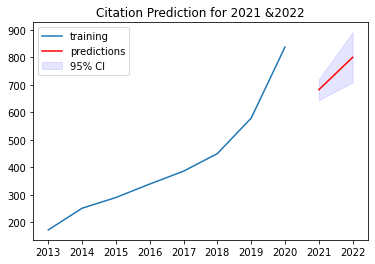

In [139]:
#Plotting
pyplot.title('Citation Prediction for 2021 &2022')
pyplot.plot(df_7['Citation'],label='training')
pyplot.plot(df_7['prediction'], color='red',label='predictions')
pyplot.fill_between(df_7.index, df_7['ci_lower'], df_7['ci_upper'], alpha=0.1, color='b', label="95% CI")
pyplot.legend()
pyplot.show()


# Part III - Self-Reflective Essay

## Overview

Please check the assessment task specification details.
